In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report
import sklearn.metrics

In [13]:
path_dir = './images/'

In [14]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.1)
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(350,350),
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(350,350),
    subset='validation'
)

Found 2520 images belonging to 7 classes.
Found 280 images belonging to 7 classes.


In [11]:
import matplotlib.image as img
image = img.imread(path_dir)

print (image.shape)

IsADirectoryError: [Errno 21] Is a directory: './images/'

In [5]:
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(350,350, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth_convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax') 
]) 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = model.fit(train_generator,batch_size=32,epochs=50)
model.save('model_4.h5')
yhat = model.predict(train_generator)

Epoch 1/50
79/79 [==============================] - 1036s 13s/step - loss: 2.2169 - accuracy: 0.1459
Epoch 2/50
79/79 [==============================] - 1139s 14s/step - loss: 1.9459 - accuracy: 0.1436
Epoch 3/50
79/79 [==============================] - 1119s 14s/step - loss: 1.9461 - accuracy: 0.1332
Epoch 4/50
79/79 [==============================] - 1080s 14s/step - loss: 1.9459 - accuracy: 0.1440
Epoch 5/50
79/79 [==============================] - 1209s 15s/step - loss: 1.9459 - accuracy: 0.1466
Epoch 6/50
79/79 [==============================] - 1093s 14s/step - loss: 1.9460 - accuracy: 0.1383
Epoch 7/50
79/79 [==============================] - 1055s 13s/step - loss: 1.9460 - accuracy: 0.1327
Epoch 8/50
79/79 [==============================] - 1054s 13s/step - loss: 1.9461 - accuracy: 0.1352
Epoch 9/50
79/79 [==============================] - 1060s 13s/step - loss: 1.9460 - accuracy: 0.1355
Epoch 10/50
79/79 [==============================] - 1051s 13s/step - loss: 1.9460 - accura

9/9 [==============================] - 16s 2s/step - loss: 0.0608 - accuracy: 0.9962
n Test_Accuracy:- 0.9961538314819336
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260

confusion matrix
[[21  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [ 0  0  0 40  0  0  0]
 [ 0  0  0  0 41  0  0]
 [ 0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0 40]]


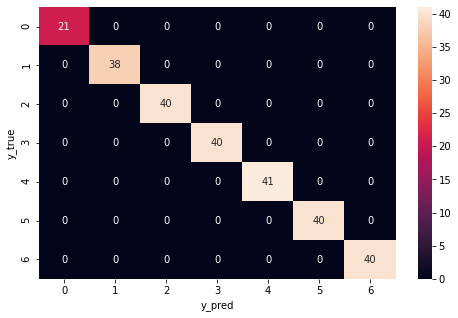

In [6]:
# evaluation du modele cnn
accuracy = model.evaluate(validation_generator)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print(classification_report(y_true, y_pred, labels=[0,1, 2,3,4,5,6]))
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
#from sklearn.metrics import recall_score
#print (recall_score(y_true, y_pred, average='macro'))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
#plt.savefig('confusion_matrix_cnn.png')
plt.show()

In [1]:


import matplotlib.pyplot as plt

loss_curve = history_cnn.history["loss"]
acc_curve = history_cnn.history["accuracy"]

#loss_val_curve = history.history["val_loss"]
#acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="cnn_loss",  marker=11)

plt.legend(loc="upper left")
plt.title("loss")
plt.savefig('acc_loss.png')
plt.show()

plt.plot(acc_curve, label="cnn_acc",  marker=11)

plt.legend(loc="upper left")
plt.title("Accuracy")
plt.savefig('acc_cnn.png')
plt.show()

NameError: name 'history_cnn' is not defined